In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("it_company.csv")
df

,Experience_Years,Age,Projects_Done,Education_Level,Department,Gender,Salary
0,2,41,9,Bachelors,Marketing,Male,36726.40
1,3,40,3,PhD,Marketing,Female,44435.72
2,0,37,9,Bachelors,Finance,Male,34393.42
3,17,51,4,Masters,Marketing,Female,58814.40
4,17,59,8,High School,Finance,Female,52726.46
...,...,...,...,...,...,...,...
495,19,28,3,PhD,Marketing,Female,75725.77
496,13,35,2,PhD,HR,Male,58317.81
497,14,28,1,Bachelors,HR,Female,49198.01
498,2,52,9,High School,IT,Female,35242.66


In [3]:
Education_Level = LabelEncoder()
Department = LabelEncoder()
Gender = LabelEncoder()

df['Education_Level'] = Education_Level.fit_transform(df['Education_Level'])
df['Department'] = Department.fit_transform(df['Department'])
df['Gender'] = Gender.fit_transform(df['Gender'])

In [4]:
x = df.drop("Salary",axis = 1)
y = df["Salary"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [6]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = model.predict(x_test)
y_pred

array([34834.44206114, 44295.16194834, 50585.6494929 , 52037.28934959,
       45929.59468518, 57983.62687932, 43923.2441187 , 56717.25603375,
       34157.65508341, 34246.35463489, 57077.3395994 , 37891.88332886,
       50968.32814039, 42856.29525739, 47427.62716831, 64799.04989456,
       40386.8134461 , 52511.56881379, 57103.18755864, 47369.92974748,
       63470.75631486, 63484.55993104, 60631.0568155 , 55166.2243537 ,
       59375.17674993, 57849.82068274, 39318.10535882, 45936.331072  ,
       42899.03236208, 49836.21723083, 55671.49243239, 48545.06189782,
       41673.2447402 , 61849.38260013, 41668.08777861, 53917.35017785,
       49352.07086437, 34008.18896281, 36727.63496793, 57977.28793769,
       50712.39071534, 45118.60406568, 32190.49509942, 54361.44011647,
       50048.94185043, 36974.31301497, 46048.4102873 , 48756.67034032,
       54802.80439207, 48392.06335326, 55899.84569708, 40309.84382326,
       33441.85899707, 42254.25993883, 46920.1461242 , 60520.35573444,
      

In [8]:
mse = mean_squared_error(y_pred,y_test)
mse

root = np.sqrt(mse)
root

r_mse = r2_score(y_test, y_pred)
r_mse

0.8127260118032504

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Salary for new employee: ₹51547.58


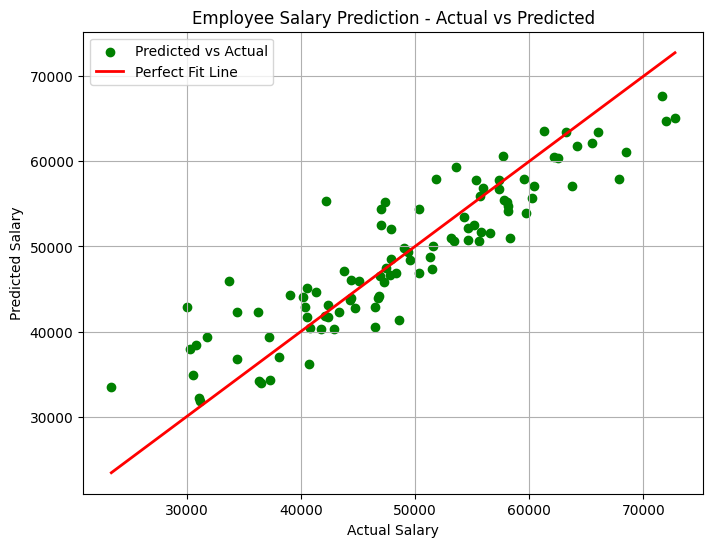

In [9]:
new_education = Education_Level.transform(['Masters'])[0]
new_dep = Department.transform(['IT'])[0]
new_gender = Gender.transform(['Female'])[0]

new_data = [[10, 35, 6, new_education, new_dep, new_gender]]
predicted_salary = model.predict(new_data)[0]
print(f"Predicted Salary for new employee: ₹{predicted_salary:.2f}")


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Employee Salary Prediction - Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()